In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn.functional as F

In [3]:
df = pd.read_csv('Iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
array = df.values
X, y = array[:,1:5] , array[:,5]

In [5]:
y = df['Species'].map({'Iris-setosa':0 , 'Iris-versicolor':1 , 'Iris-virginica':2
})


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

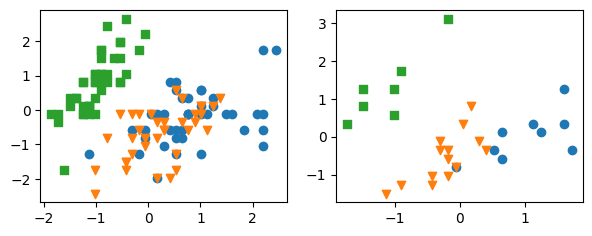

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(7, 2.5))
ax[0].scatter(X_train[y_train == 2, 0], X_train[y_train == 2, 1])
ax[0].scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], marker='v')
ax[0].scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], marker='s')
ax[1].scatter(X_test[y_test == 2, 0], X_test[y_test == 2, 1])
ax[1].scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], marker='v')
ax[1].scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], marker='s')
plt.show()


In [8]:
# dataframe / array to tensor
X_train_tensor, X_test_tensor = torch.Tensor(X_train),torch.Tensor(X_test)
y_train_tensor, y_test_tensor = torch.Tensor(y_train.values),torch.Tensor(y_test.
values)

In [9]:
class SoftmaxRegression(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(SoftmaxRegression, self).__init__()
        self.linear = torch.nn.Linear(num_features, num_classes)
        # initialize weights to zeros here,
        # since we used zero weights in the
        # manual approach
        self.linear.weight.detach().zero_()
        self.linear.bias.detach().zero_()
        # Note: the trailing underscore
        # means "in-place operation" in the context
        # of PyTorch
    def forward(self, x):
        logits = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas
    def predict_labels(self, x):
        logits, probas = self.forward(x)
        labels = torch.argmax(probas, dim=1)
        return labels
    def evaluate(self, x, y):
        labels = self.predict_labels(x).float()
        accuracy = torch.sum(labels.view(-1) == y.float()).item() / y.size(0)
        return accuracy


In [11]:
model2 = SoftmaxRegression(num_features=4, num_classes=3)
optimizer = torch.optim.SGD(model2.parameters(), lr=0.1)


In [12]:
def comp_accuracy(true_labels, pred_labels):
    accuracy = torch.sum(true_labels.view(-1).float() == pred_labels.float()).item() / true_labels.size(0)

    return accuracy


In [16]:
num_epochs = 100
for epoch in range(num_epochs):
    #### Compute outputs ####
    logits, probas = model2(X_train_tensor)
    #### Compute gradients ####
    cost = F.cross_entropy(logits, y_train_tensor.long())
    optimizer.zero_grad()
    cost.backward()
    #### Update weights ####
    optimizer.step()
    #### Logging ####
    logits, probas = model2(X_train_tensor)
    acc = comp_accuracy(y_train_tensor, torch.argmax(probas, dim=1))
    print('Epoch: %03d' % (epoch + 1), end="")
    print(' | Train ACC: %.3f' % acc, end="")
    print(' | Cost: %.3f' % F.cross_entropy(logits, y_train_tensor.long()))

Epoch: 001 | Train ACC: 0.825 | Cost: 0.392
Epoch: 002 | Train ACC: 0.825 | Cost: 0.390
Epoch: 003 | Train ACC: 0.833 | Cost: 0.388
Epoch: 004 | Train ACC: 0.833 | Cost: 0.386
Epoch: 005 | Train ACC: 0.833 | Cost: 0.384
Epoch: 006 | Train ACC: 0.833 | Cost: 0.382
Epoch: 007 | Train ACC: 0.833 | Cost: 0.380
Epoch: 008 | Train ACC: 0.833 | Cost: 0.379
Epoch: 009 | Train ACC: 0.833 | Cost: 0.377
Epoch: 010 | Train ACC: 0.833 | Cost: 0.375
Epoch: 011 | Train ACC: 0.833 | Cost: 0.374
Epoch: 012 | Train ACC: 0.833 | Cost: 0.372
Epoch: 013 | Train ACC: 0.833 | Cost: 0.370
Epoch: 014 | Train ACC: 0.833 | Cost: 0.369
Epoch: 015 | Train ACC: 0.833 | Cost: 0.367
Epoch: 016 | Train ACC: 0.833 | Cost: 0.366
Epoch: 017 | Train ACC: 0.833 | Cost: 0.364
Epoch: 018 | Train ACC: 0.833 | Cost: 0.363
Epoch: 019 | Train ACC: 0.833 | Cost: 0.361
Epoch: 020 | Train ACC: 0.833 | Cost: 0.360
Epoch: 021 | Train ACC: 0.833 | Cost: 0.359
Epoch: 022 | Train ACC: 0.833 | Cost: 0.357
Epoch: 023 | Train ACC: 0.833 | 

In [14]:
print('\nModel parameters:')
print(' Weights: %s' % model2.linear.weight)
print(' Bias: %s' % model2.linear.bias)


Model parameters:
 Weights: Parameter containing:
tensor([[-0.4836,  0.4746, -0.6741, -0.6342],
        [ 0.1270, -0.4679,  0.1336, -0.0367],
        [ 0.3567, -0.0067,  0.5405,  0.6709]], requires_grad=True)
 Bias: Parameter containing:
tensor([-0.0799,  0.1491, -0.0692], requires_grad=True)


In [15]:
test_acc = model2.evaluate(X_test_tensor, y_test_tensor)
print('Test set accuracy: %.2f%%' % (test_acc*100))


Test set accuracy: 90.00%
